# Data Cleansing

## Libraries

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

## Loading data

In [2]:
df=pd.read_csv("data/food_delivery_time.csv")

---
# Understand, prepare, cleanse the data

## Understanding data information

In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


## Understanding data dictionary

|Column|Description |
| :------------ |:---------------:|
|**ID**|order ID number| 
|**Delivery_person_ID**|ID number of the delivery partner|
|**Delivery_person_Age**|Age of the delivery partner|
|**Delivery_person_Ratings**|Ratings of the delivery partner based on past deliveries|
|**Restaurant_latitude**|The latitude of the restaurant|
|**Restaurant_longitude**|The longitude of the restaurant|
|**Delivery_location_latitude**|The latitude of the delivery location|
|**Delivery_location_longitude**|The longitude of the delivery location|
|**Order_Date**|Date of the order|
|**Time_Orderd**|Time the order was placed|
|**Time_Order_picked**|Time the order was picked|
|**Weatherconditions**|Weather conditions of the day|
|**Road_traffic_density**|Density of the traffic|
|**Vehicle_condition**|Condition of the vehicle|
|**Type_of_order**|The type of meal ordered by the customer|
|**Type_of_vehicle**|The type of vehicle delivery partner rides|
|**multiple_deliveries**|Amount of deliveries driver picked|
|**Festival**|If there was a Festival or no.|
|**City**|Type of city|
|**Time_taken(min)**| The time taken by the delivery partner to complete the order|

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [5]:
df.shape

(45593, 20)

We have 20 features and 45593 rows

**From the above output, we can conclude and note that:**

- There are no missing values in this datasets
- Still some features that don't have correct datatypes like: Delivery_person_Age, Delivery_person_Ratings and multiple_deliveries, Time_taken(min), it is possible that there are non-numeric characters in this columns, causing the data to be converted to object format, except column Time_taken(min) because the phrase (min) appears; Order_Date, Time_Ordered, Time_Order_picked are not in datetime.

## Data Cleanse 
Data cleansing, also known as data cleaning or data scrubbing, is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset. The goal of data cleansing is to improve the quality of data so that it can be used effectively in data analysis, decision-making, and other applications.

Fortunately the data is already very clean, but there are some columns that need a touch, so for this section my focus will be:

- Remove "condition" from Weatherconditions
- Change datatype
- Check and handle missing values.
- Transform target variable (Time_taken(min)) into an int.
- Create some new variables by merging or transforming old variables.

### Remove "condition" from Weatherconditions

In [6]:
df['Weatherconditions']=df['Weatherconditions'].str.slice(start=10)

### Change datatype

In [7]:
# Check for strange characters appearing in the numerical columns
def check_invalid(col, reg=r'^[0-9]+$', replace_reg=r'[0-9]'):
    invalid_row=df[col][~df[col].str.match(reg)]
    invalid_count=invalid_row.count()

    invalid=df[col].str.replace(replace_reg, '', regex=True).unique()
    
    return invalid, invalid_count

In [8]:
for col in df[['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries']].columns:
    print(col, check_invalid(col))

Delivery_person_Age (array(['', 'NaN '], dtype=object), 1854)
Delivery_person_Ratings (array(['.', '', 'NaN '], dtype=object), 40423)
multiple_deliveries (array(['', 'NaN '], dtype=object), 993)


We can see that there are non-numeric characters in columns that should be numeric. Most of them are the phrase 'NaN '. Since this is a phrase for missing values, I suspect that such a phrase may appear in other columns.

In [9]:
# Find 'NaN ' in all columns
df.map(lambda x: 'NaN' in str(x)).sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

There are quite a few columns containing such a phrase, we will replace that phrase with np.nan

In [10]:
# Remove space character in categorical columns
df=df.map(lambda x: str(x).replace(' ', '') if ' ' in str(x) else x)

In [11]:
# Replace all 'NaN ' by np.nan
df=df.map(lambda x: np.nan if 'NaN' in str(x) else x)
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

Convert the numeric columns to the correct data type (because the Age column should be an integer, but because we replaced the string with np.nan, we cannot convert the Age column to int type but must use float type)

In [12]:
df['Delivery_person_Age']=df['Delivery_person_Age'].astype('float')
df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].astype('float')
df['multiple_deliveries']=df['multiple_deliveries'].astype('float')

### Check and handle missing values

Handling missing values in data is crucial because they can create complications for statistical analyses and machine learning models. The presence of missing values can result in inaccurate or biased outcomes by altering statistical properties, such as the mean or variance, of the data. Consequently, conclusions drawn from such data may not be reliable. Moreover, some statistical tests require complete data to be valid.

Handling missing values can address these issues by replacing the missing data with estimates derived from existing data. This preserves the statistical characteristics of the data and can enhance the performance of machine learning models. Nevertheless, it is crucial to use suitable imputation techniques and carefully assess the potential influence of the imputed data on the analyses or models employed.

In [13]:
# Check for missing values
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [14]:
# Calculate percentage of missing values
missing_values=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)[:8], columns=['Number_of_missing'])
missing_values['Percentage (%)']=(missing_values['Number_of_missing']/df.shape[0]*100).round(2)
missing_values

,Number_of_missing,Percentage (%)
Delivery_person_Ratings,1908,4.18
Delivery_person_Age,1854,4.07
Time_Orderd,1731,3.80
City,1200,2.63
multiple_deliveries,993,2.18
Weatherconditions,616,1.35
Road_traffic_density,601,1.32
Festival,228,0.50


Although the number of missing values ​​is not large, the number in each column is only less than 5%, so we can keep it instead of deleting it. However, to be able to fill in the missing data, we need to determine the type of missing value (MCAR, MAR, MNAR). Since this is data taken from the tracking system of an express delivery application, it can be inferred that the missing data may occur due to errors in data collection, which may fall into MCAR or MAR because most of the columns are information that is not affected by other columns. Therefore, we can assume that the missing data in this case is not MNAR, so we can use some methods to fill in the missing data.

''

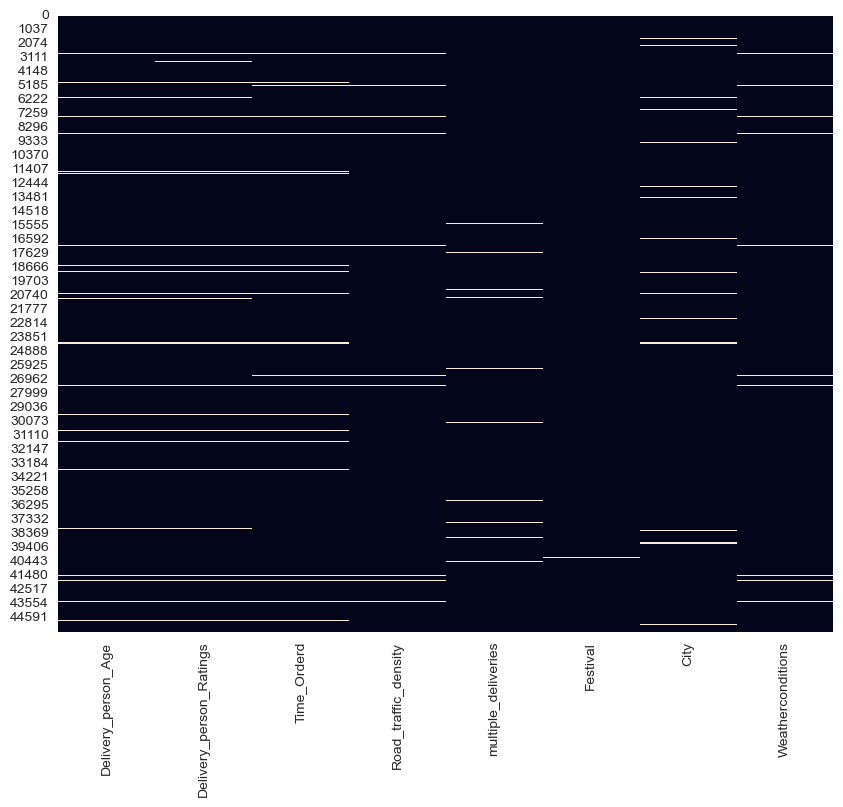

In [15]:
plt.figure(figsize=(10,8))
columns=['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_Orderd', 'Road_traffic_density', 'multiple_deliveries', 'Festival', 'City', 'Weatherconditions']
sns.heatmap(df[columns].isnull(), cbar=False)
;

You can see that quite a few rows are missing information in multiple columns at the same time. We will draw a chart to see the number of missing columns by row.

''

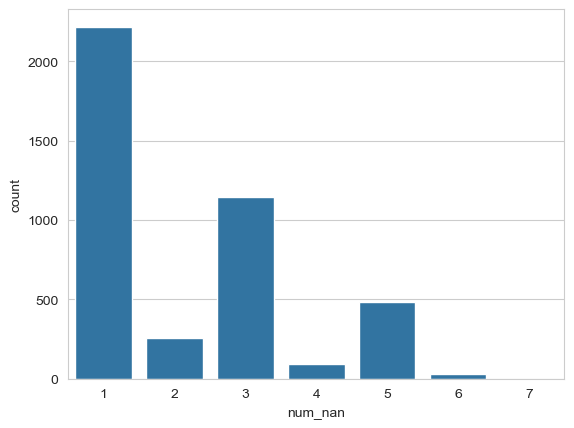

In [16]:
total_nan=df.isnull().sum(axis=1).to_frame(name='num_nan')
sns.countplot(data=total_nan[total_nan['num_nan']!=0], x='num_nan')
;

Since our original data consists of 20 variables, we will use about 12-14 independent variables to evaluate the dependent variable Time_taken. However, the data has rows containing 4 or more missing values. Having observations with such a large amount of missing information, although we can fill in the missing values, they will not contribute much value to model building. Therefore, we will delete rows with missing information in 4 or more columns and will use the filling method for the remaining rows.

In [17]:
# Number of rows with more than 3 missing values
df.shape[0]-total_nan[total_nan['num_nan']<4].shape[0]

604

In [18]:
df['total_nan']=total_nan['num_nan']
df=df[df['total_nan']<4]

# Check missing values of new data
missing_values=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)[:8], columns=['Number_of_missing'])
missing_values['Percentage (%)']=(missing_values['Number_of_missing']/df.shape[0]*100).round(2)
missing_values

,Number_of_missing,Percentage (%)
Delivery_person_Ratings,1306,2.90
Delivery_person_Age,1252,2.78
City,1144,2.54
Time_Orderd,1128,2.51
multiple_deliveries,942,2.09
Festival,218,0.48
Weatherconditions,89,0.20
Road_traffic_density,89,0.20


Now we have a new data set, but there are still missing values. Now we will look at each variable to decide what method we will use to fill in the missing values.

#### Delivery_person_Ratings

Delivery_person_Ratings is the feature with the most missing values, with around 2.9% of the dataset.

''

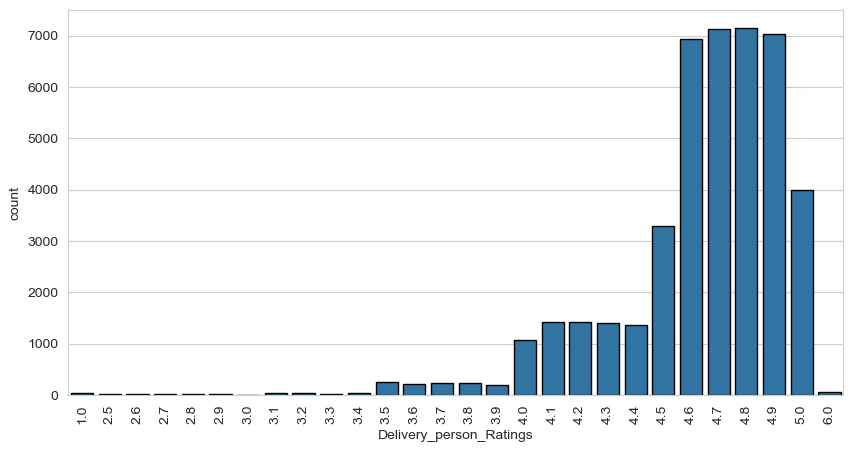

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Delivery_person_Ratings', edgecolor='k')
plt.xticks(rotation=90)
;

We can see that most of the current evaluations are based on a scale of 1 to 5, however our data shows some values ​​of 6. This seems unrealistic and it is necessary to remove this value of 6 from the data before performing the calculation. However, we can convert these values ​​to the highest value in the scale of 5 to be able to keep as many rows as possible.

In [20]:
df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].apply(lambda x: 5.0 if x==6.0 else x)

In [21]:
# Calculate Mean, Median
round(df['Delivery_person_Ratings'].mean(), 1), round(df['Delivery_person_Ratings'].median(), 1)

(4.6, 4.7)

It can be seen that most of the values ​​are greater than 4.4, moreover the data is skewed left, so we will fill in the missing value with the highest value to reduce the skew (in this case, the median).

In [22]:
df['Delivery_person_Ratings'].fillna(value=4.7, inplace=True)

#### Delivery_person_Age

''

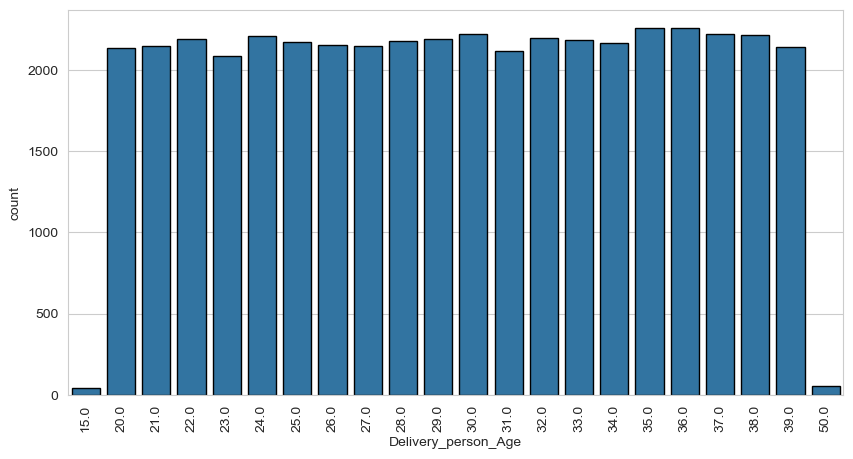

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Delivery_person_Age', edgecolor='k')
plt.xticks(rotation=90)
;

In [24]:
# Count number of delivery person with age=15 and age=50
df[(df['Delivery_person_Age']==15)|(df['Delivery_person_Age']==50)].shape[0]

89

We can see that the majority of the age range is between 20 and 39, with very few people between 15 and 50, we can remove those people to make the data more evenly distributed.

In [25]:
# Delete row with age=15 or age=50
df=df[(df['Delivery_person_Age']!=15)&(df['Delivery_person_Age']!=50)]

In [26]:
# Calculate Mean, Median
round(df['Delivery_person_Age'].mean(), 1), round(df['Delivery_person_Age'].median(), 1)

(29.6, 30.0)

After removing the 2 age groups that account for a very small number, we see that the remaining ages are well balanced. So I gonna use interpolation to fill missing values

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9076\1220610897.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9076\1220610897.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


''

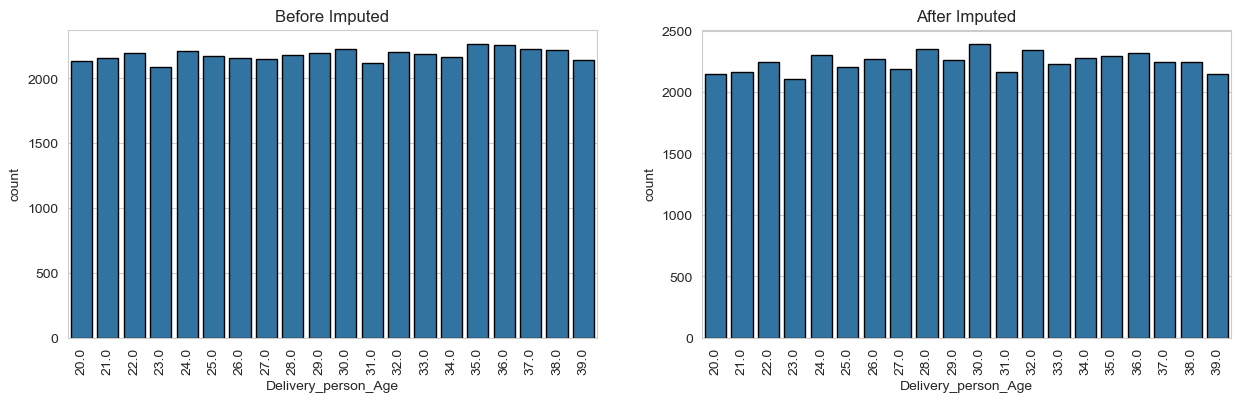

In [27]:
imputed_age=round(df['Delivery_person_Age'].interpolate(method='linear'), 0).to_frame(name='Delivery_person_Age')

fig, ax=plt.subplots(1, 2, figsize=(15,4))
sns.countplot(data=df, x='Delivery_person_Age', edgecolor='k', ax=ax[0])
sns.countplot(data=imputed_age, x='Delivery_person_Age', edgecolor='k', ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title('Before Imputed')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title('After Imputed')
;

In [28]:
# Mean difference
(df['Delivery_person_Age'].mean(), \
imputed_age['Delivery_person_Age'].mean(), \
round(df['Delivery_person_Age'].mean()-imputed_age['Delivery_person_Age'].mean(), 5))

(29.555008247800586, 29.553964365256125, 0.00104)

In [29]:
df['Delivery_person_Age']=imputed_age['Delivery_person_Age']

#### City

''

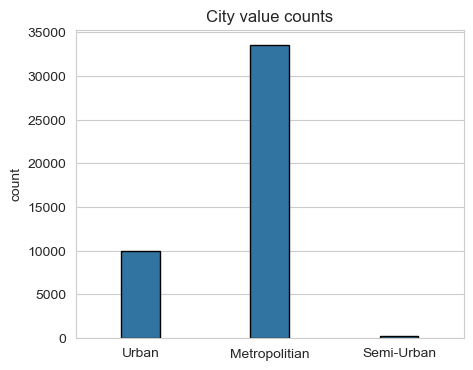

In [30]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='City', edgecolor='k', width=0.3)
plt.xlabel(None)
plt.title('City value counts')
;

In [31]:
df['City'].fillna(value='Metropolitian', inplace=True)

#### multiple_deliveries

''

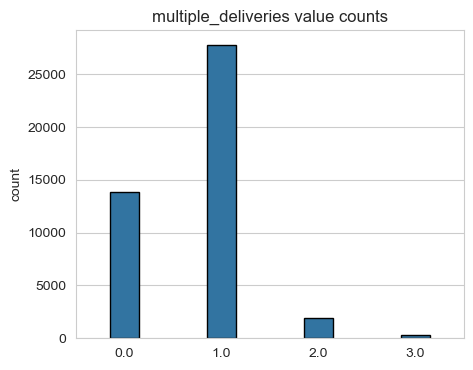

In [32]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='multiple_deliveries', edgecolor='k', width=0.3)
plt.xlabel(None)
plt.title('multiple_deliveries value counts')
;

In [33]:
df['multiple_deliveries'].fillna(value=1.0, inplace=True)

In [34]:
df['multiple_deliveries']=df['multiple_deliveries']+1

#### Festival

''

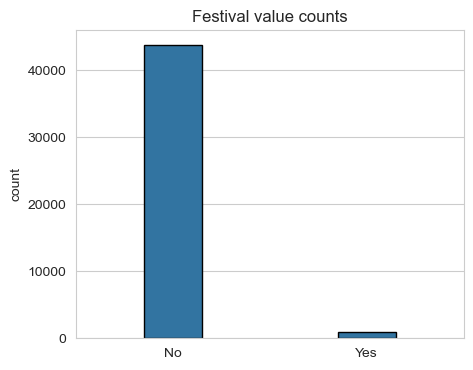

In [35]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Festival', edgecolor='k', width=0.3)
plt.xlabel(None)
plt.title('Festival value counts')
;

In [36]:
df['Festival'].fillna(value='No', inplace=True)

#### Road_traffic_density

''

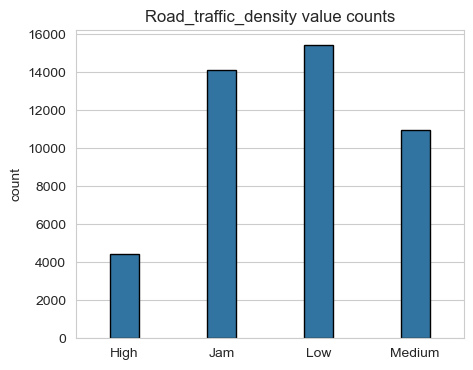

In [37]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Road_traffic_density', edgecolor='k', width=0.3)
plt.xlabel(None)
plt.title('Road_traffic_density value counts')
;

In [38]:
df['Road_traffic_density'].fillna(value='Low', inplace=True)

### Transform target

In [39]:
df['Time_taken(min)']=df['Time_taken(min)'].str.slice(start=5)
df['Time_taken(min)']=df['Time_taken(min)'].astype('int')

### Create some new variables by merging or transforming old variables.

#### Feature Engineering new variables and Convert to pd.to_datetime

In [40]:
df['Order_Date']=df['Order_Date']+' '+df['Time_Order_picked']
df['Order_Date']=pd.to_datetime(df['Order_Date'], format='%d-%m-%Y %H:%M:%S')
df['pick_time']=df['Order_Date'].dt.hour

Next we will calculate the distance between 2 points based on longitude and latitude. First we will look at the longitude and latitude statistics of both the restaurant and delivery location.

In [41]:
df[['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']].describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
count,44900.000000,44900.000000,44900.000000,44900.000000
mean,17.144541,70.610362,17.468425,70.830592
std,7.927552,21.654219,7.339877,21.136970
min,-30.905562,-88.352885,0.010000,0.010000
25%,12.933298,73.170283,12.988453,73.279083
50%,18.551440,75.898497,18.634382,76.002471
75%,22.728163,78.045359,22.785207,78.105359
max,30.914057,88.433452,31.054057,88.563452


We can see a problem that the latitude and longitude values ​​of Delivery_location are both positive values, while the latitude and longitude of Restaurant appear to be negative values, which shows that there may be a combination like A(-2,-3) and B(4,5), in this project, we will use the Haversine formula to calculate the distance between two points on the map. However, the combination of the coordinates of 2 points with both positive and negative values ​​will lead to very large distances, which is even more unreasonable in the context of food delivery, where a relatively close distance and fast delivery time are required. Therefore, we will convert the negative values ​​in the 2 columns longitude and latitude of Restaurant to positive values.

Although this calculation method will give the result as the crow flies (ie the shortest distance between 2 points), in reality it is difficult to find such a short route. Therefore, the actual distance is always greater than or equal to the calculated distance.

In [42]:
# Convert negative value in longitude and latitude of Restaurant to positive
df['Restaurant_latitude']=np.where(df['Restaurant_latitude']<0, df['Restaurant_latitude']*-1, df['Restaurant_latitude'])
df['Restaurant_longitude']=np.where(df['Restaurant_longitude']<0, df['Restaurant_longitude']*-1, df['Restaurant_longitude'])

In [43]:
# Calculate the distance between restaurant and delivery location by using longitude and latitude and haversine formula
from sklearn.metrics.pairwise import haversine_distances
# Create function
def distance(lat_a, long_a, lat_b, long_b):
    df_copy=df.copy()
    for col in [lat_a, long_a, lat_b, long_b]:
        df_copy[col+'_rad']=df_copy[col]*np.pi/180
    df['distance'] = df_copy.apply(
        lambda row: haversine_distances([[row[lat_a+'_rad'], row[long_a+'_rad']], 
                                     [row[lat_b+'_rad'], row[long_b+'_rad']]])[0, 1],
        axis=1
        )
    df['distance'] = (df['distance']*6371).round(3)
    return df['distance']

df['distance']=distance('Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude')

## Completing the data

Drop unnecessary columns to reduce data size

In [44]:
df.drop(columns=['Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'total_nan'], inplace=True)

In [45]:
df.rename(columns={'Time_taken(min)':'Time_taken'}, inplace=True)

## Section Summary

This part of the project focused in cleaning the data, creating new features and handle the missing values. The output of this section is a more clean and interpretable dataset to analyse in the next notebook.

In [46]:
df.to_csv('data/cleaned_data.csv', index = False, encoding = 'utf-8')